In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import simps
import matplotlib.pyplot as plt
import csv
import pandas as pd
from astropy.time import Time

In [2]:
data=[]

with open("kailai_radio_final.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    data.append(row)

In [3]:
data

[['1', '2022-09-13 15:11:47'],
 ['2', '2022-09-13 15:11:48'],
 ['3', '2022-09-13 15:11:48'],
 ['4', '2022-09-13 15:11:52'],
 ['5', '2022-09-13 15:11:56'],
 ['6', '2022-09-13 15:11:57'],
 ['7', '2022-09-13 15:12:01'],
 ['8', '2022-09-13 15:12:03'],
 ['9', '2022-09-13 15:12:03'],
 ['10', '2022-09-13 15:12:04'],
 ['11', '2022-09-13 15:12:05'],
 ['12', '2022-09-13 15:12:06'],
 ['13', '2022-09-13 15:12:09'],
 ['14', '2022-09-13 15:12:10'],
 ['15', '2022-09-13 15:12:11'],
 ['16', '2022-09-13 15:12:12'],
 ['17', '2022-09-13 15:12:13'],
 ['18', '2022-09-13 15:12:15'],
 ['19', '2022-09-13 15:12:16'],
 ['20', '2022-09-13 15:12:17'],
 ['21', '2022-09-13 15:12:18'],
 ['22', '2022-09-13 15:12:19'],
 ['23', '2022-09-13 15:12:20'],
 ['24', '2022-09-13 15:12:21'],
 ['25', '2022-09-13 15:12:22'],
 ['26', '2022-09-13 15:12:23'],
 ['27', '2022-09-13 15:12:24'],
 ['28', '2022-09-13 15:12:25'],
 ['29', '2022-09-13 15:12:27'],
 ['30', '2022-09-13 15:12:28'],
 ['31', '2022-09-13 15:12:28'],
 ['32', '2022-09-

In [4]:
data[-1]

['32510', '2022-09-14 3:42:07']

In [49]:
print("total data points: ", len(data))

total data points:  32510


In [50]:
data[0][1], data[-1][1]

('2022-09-13 15:11:47', '2022-09-14 3:42:07')

In [51]:
t0=Time(data[0][1]).jd

In [52]:
data[10][1][:10]+"T"+data[10][1][11:]

'2022-09-13T15:12:05'

In [53]:
for i in range(0,len(data)):
    data[i][1]=data[i][1][:10]+"T"+data[i][1][11:]

In [54]:
print(data[40][1])

2022-09-13T15:12:53


In [55]:
Time(data[0][1]).jd

2459836.13318287

In [56]:
for i in range(0,len(data)):
    data[i][1]=Time([data[i][1]]).jd-t0

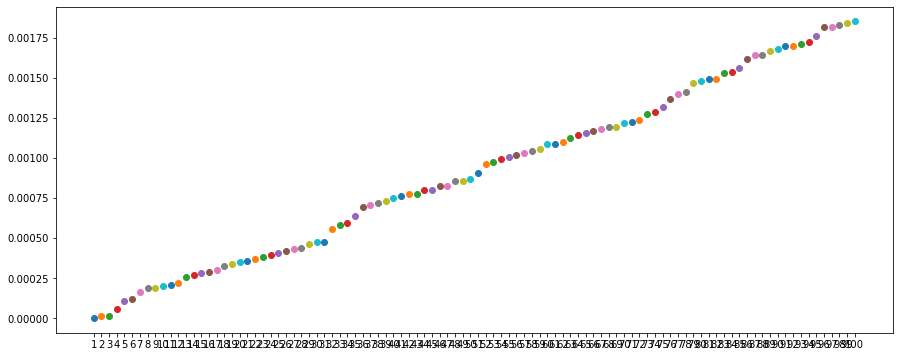

In [57]:
#for i in range(0,len(data)):
for i in range(0,100):
    plt.scatter(data[i][0],data[i][1])

In [58]:
#print(data)

In [59]:
data_change=[]
index_array=[]
delta_t_array=[]
for i in range(0,len(data)-1):
#for i in range(0,1000):
    index_array.append(i)
    delta_t=24*60*60*(float(data[i+1][1])-float(data[i][1]))
    #print(delta_t)
    delta_t_array.append(delta_t)

In [60]:
data_change.append(index_array)
data_change.append(delta_t_array)

Text(0, 0.5, 'delta_t')

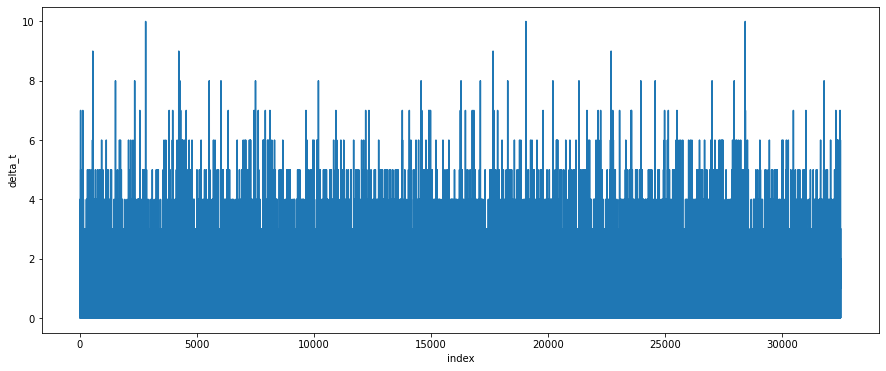

In [61]:
plt.plot(data_change[0],data_change[1])
plt.xlabel("index")
plt.ylabel("delta_t")

Text(0.5, 1.0, 'Time between Events without the Cover')

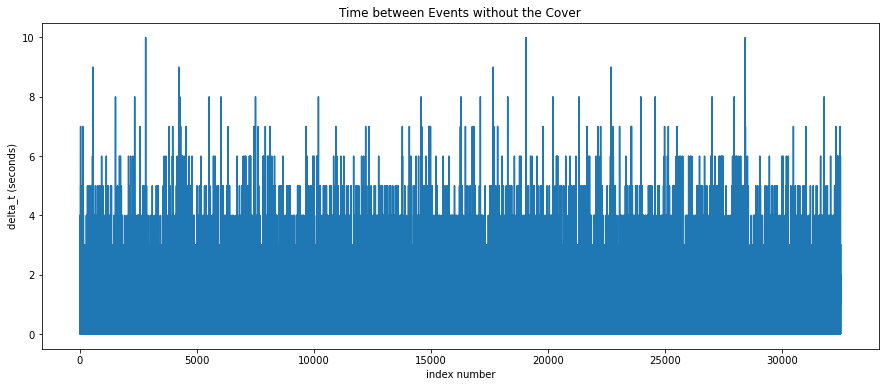

In [62]:
plt.plot(data_change[0],data_change[1])
plt.xlabel("index number")
plt.ylabel("delta_t (seconds)")
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Time between Events without the Cover")

Text(0.5, 1.0, 'Time between Events without the Cover')

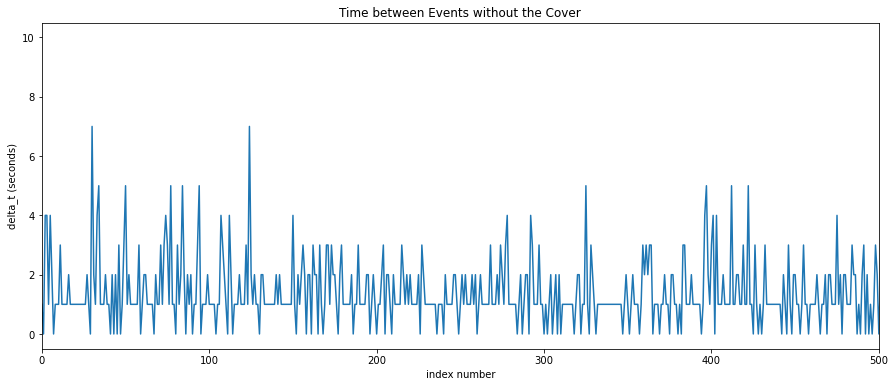

In [63]:
plt.plot(data_change[0],data_change[1])
plt.xlim(0,500)
plt.xlabel("index number")
plt.ylabel("delta_t (seconds)")
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Time between Events without the Cover")

Text(0.5, 1.0, 'Radio Source Closed Setup Histogram: number of events vs. time between successive arrival')

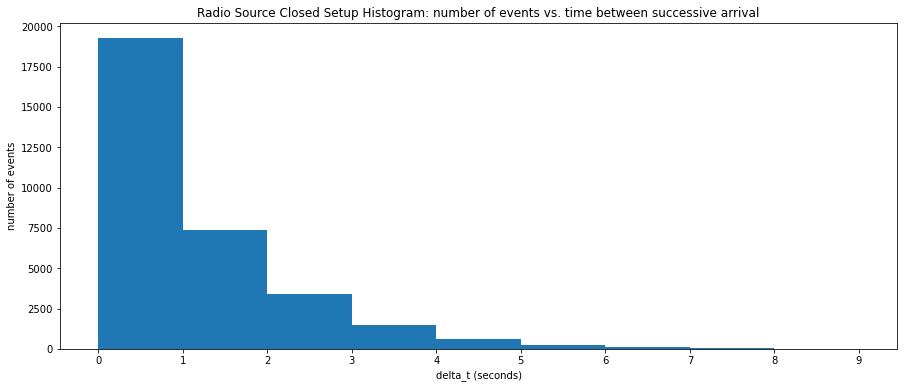

In [72]:
plt.hist(data_change[1],bins=np.arange(0,10,1))
plt.xticks(np.arange(0,10,1))
plt.xlabel("delta_t (seconds)")
plt.ylabel("number of events")
plt.title("Radio Source Closed Setup Histogram: number of events vs. time between successive arrival")

In [65]:
#Poisson Statistics here
t_avg=0
for i in data_change[1]:
    t_avg+=i

t_avg=t_avg/len(data_change[1])
print("t_avg",t_avg)

t_avg 1.3848472738512412


In [66]:
acc_0=0
acc_1=0
acc_2=0
acc_3=0
acc_4=0
acc_5=0
acc_6=0

for i in data_change[1]:
    if i<1:
        acc_0+=1
    elif i <2:
        acc_1+=1
    elif i<3:
        acc_2+=1
    elif i<4:
        acc_3+=1
    elif i<5:
        acc_4+=1
    elif i<6:
        acc_5+=1
    else:
        acc_6+=1

print(acc_0)
print(acc_1)
print(acc_2)
print(acc_3)
print(acc_4)
print(acc_5)
print(acc_6)


19250
7381
3372
1477
604
259
166


In [74]:
total=len(data_change[1])
print("total is: ", total)
exps=[0.514281,0.249796,0.121331,0.0589325,0.0286246,0.0139035,0.0131313]
for i in range(0,len(exps)):
    exps[i]=total*exps[i]

chi2=0
print("total",total)
exp0=exps[0]
obs0=acc_0
print("expected is: " + str(exp0) + "; observed is: " + str(obs0))
chi2+=((obs0-exp0)**2)/acc_0
print("change:", str((obs0-exp0)**2/exp0))

exp1=exps[1]
obs1=acc_1
print("expected is: " + str(exp1) + "; observed is: " + str(obs1))
chi2+=(obs1-exp1)**2/acc_1
print("change:", (obs1-exp1)**2/exp1)

exp2=exps[2]
obs2=acc_2
print("expected is: " + str(exp2) + "; observed is: " + str(obs2))
chi2+=(obs2-exp2)**2/acc_2
print("change:", (obs2-exp2)**2/exp2)

exp3=exps[3]
obs3=acc_3
print("expected is: " + str(exp3) + "; observed is: " + str(obs3))
chi2+=(obs3-exp3)**2/acc_3
print("change:", (obs3-exp3)**2/exp3)

exp4=exps[4]
obs4=acc_4
print("expected is: " + str(exp4) + "; observed is: " + str(obs4))
chi2+=(obs4-exp4)**2/acc_4
print("change:", (obs4-exp4)**2/exp4)

exp5=exps[5]
obs5=acc_5
print("expected is: " + str(exp5) + "; observed is: " + str(obs5))
chi2+=(obs5-exp5)**2/acc_5
print("change:", (obs5-exp5)**2/exp5)

exp6=exps[6]
obs6=acc_6
print("expected is: " + str(exp6) + "; observed is: " + str(obs6))
chi2+=(obs6-exp6)**2/acc_6
print("change:", (obs6-exp6)**2/exp6)

print("----------")
print("chi2_total: ", chi2)

total is:  32509
total 32509
expected is: 16718.761029; observed is: 19250
change: 383.2323888830873
expected is: 8120.6181639999995; observed is: 7381
change: 67.36371757310596
expected is: 3944.349479; observed is: 3372
change: 83.05144558200327
expected is: 1915.8366425; observed is: 1477
change: 100.51879921733607
expected is: 930.5571214; observed is: 604
change: 114.5975363410446
expected is: 451.9888815; observed is: 259
change: 82.40182426394716
expected is: 426.8854317; observed is: 166
change: 159.43670928814078
----------
chi2_total:  1364.851327651932


In [68]:
#use test source to test poisson
#check out reduced chi^2; 2DOF
#check out def of chi^2; check uncertainty
#uncertainty: 2 counts per second 


In [69]:
# print(len(data_change[1]))

# #first 12 hours: 7848 data points
# data_12_1=data_change[1][0:7849]

# plt.hist(data_12_1,bins=np.arange(0,40,1))
# plt.xticks(np.arange(0,40,1))
# plt.xlabel("delta_t (seconds)")
# plt.ylabel("number of events")
# plt.title("First 12 hours; without cover")
# plt.show()

# #second 12 hours:15753-7848=7905data points
# data_12_2=data_change[1][7849:15754]
# plt.hist(data_12_2,bins=np.arange(0,40,1))
# plt.xticks(np.arange(0,40,1))
# plt.xlabel("delta_t (seconds)")
# plt.ylabel("number of events")
# plt.title("Second 12 hours; without cover")
# plt.show()

# #third 12 hours: 23705-15753=7952 data points
# data_12_3=data_change[1][15754:23706]
# plt.hist(data_12_3,bins=np.arange(0,40,1))
# plt.xticks(np.arange(0,40,1))
# plt.xlabel("delta_t (seconds)")
# plt.ylabel("number of events")
# plt.title("Second 12 hours; without cover")
# plt.show()
